# Demonstration for Comparing the MSIS model versions in GEODYN

This notebook shows GODYN II output for using with the three versions of the MSIS models for thermospheric density: MSIS_86, MSIS_00, and MSIS_2.0.


Necessary modifications that were made can be found in the attached modification document.

The run parameters for the GEODYN run demoed here are:
```
 - Satellite:             Starlette
 - Observation Datatype:  SLR
 - Arc time:              14 days (2003/09/14 - 2003/09/28)
 - Gen. Accelerations:    Off
 - Density Model:         NRLMSISe86, NRLMSISe00, MSIS 2.0
```



Second, how did you test that you were getting the right density output? If you have a satellite orbit, you can
compare the GEODYN-computed-MSIS density with that supplied by an external reference.
That would be a good sanity check to do for several different orbits.





Third did you observe a change in the POD statistics for the SLR satellites you tested
(which I guess was Starlette and Stella)? 

 - Did for example the RMS of fit improve compared to the old models? 
 - And if you adjust empirical accelerations, was the OPR magnitude reduced with the new models?

## Input the Parameters of the Starlette-SLR GEODYN run and load the simulation output for each density model


In [1]:
SAT_ID = 7501001
m1 = 'msis86'                     
m2 = 'msis00'                     
m3 = 'msis2'

In [4]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import clean_nb_readdata

(AdjustedParams_m1,
Trajectory_m1,
Density_m1,
ResidsObs_m1,
ResidsSummStation_m1,
ResidsMeasSumm_m1,
Stats_m1,
#
AdjustedParams_m2,
Trajectory_m2,
Density_m2,
ResidsObs_m2,
ResidsSummStation_m2,
ResidsMeasSumm_m2,
Stats_m2,
#
AdjustedParams_m3,
Trajectory_m3,
Density_m3,
ResidsObs_m3,
ResidsSummStation_m3,
ResidsMeasSumm_m3,
Stats_m3,
) = clean_nb_readdata(m1, m2, m3)




import os

if not os.path.exists("msis_update_images"):
    os.mkdir("msis_update_images")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
              Loading  /data/runs_geodyn/st/results/msis86/msis86_acceloff/ 

 
+============================== Msis86 Run Details ==============================+
     Density model: msis86
     Satellite: starlette
     Data type: SLR

 CONVERGENCE WITHIN  2.0 PERCENT AFTER  6 ITERATIONS

 COORDINATE SYSTEM REFERENCE EPOCH 1030914    0  0.0000

 START 1030914    0  0.0000EPOCH 1030914    0  0.0000  END 1030928    0  0.0000
 INTEGRATION STEP SIZE -- ORBIT(SEC) =     15.000  VAR.EQ.(SEC) =     15.000

 SAT. ID = 7501001  AREA(M**2) =     0.04524  MASS(KG) =      47.250
    81286 ORBIT INTEGRATION STEPS  --  AVERAGE NUMBER OF CORRECTIONS = 1.0000
    81286 VARIATIONAL EQUATION INTEGRATION STEPS --  ORBIT STARTS IN SUNLIGHT
      390 TRANSITIONS BETWEEN SHADOW AND SUNLIGHT  --  28.0 PERCENT IN SHADOW
 X POS  =  -1228611.047711857     M      S.M.A. =   7329875.737190500     M  
 Y POS  =  -4721160.09861

## First, lets externally confirm that the MSIS Values are correct:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


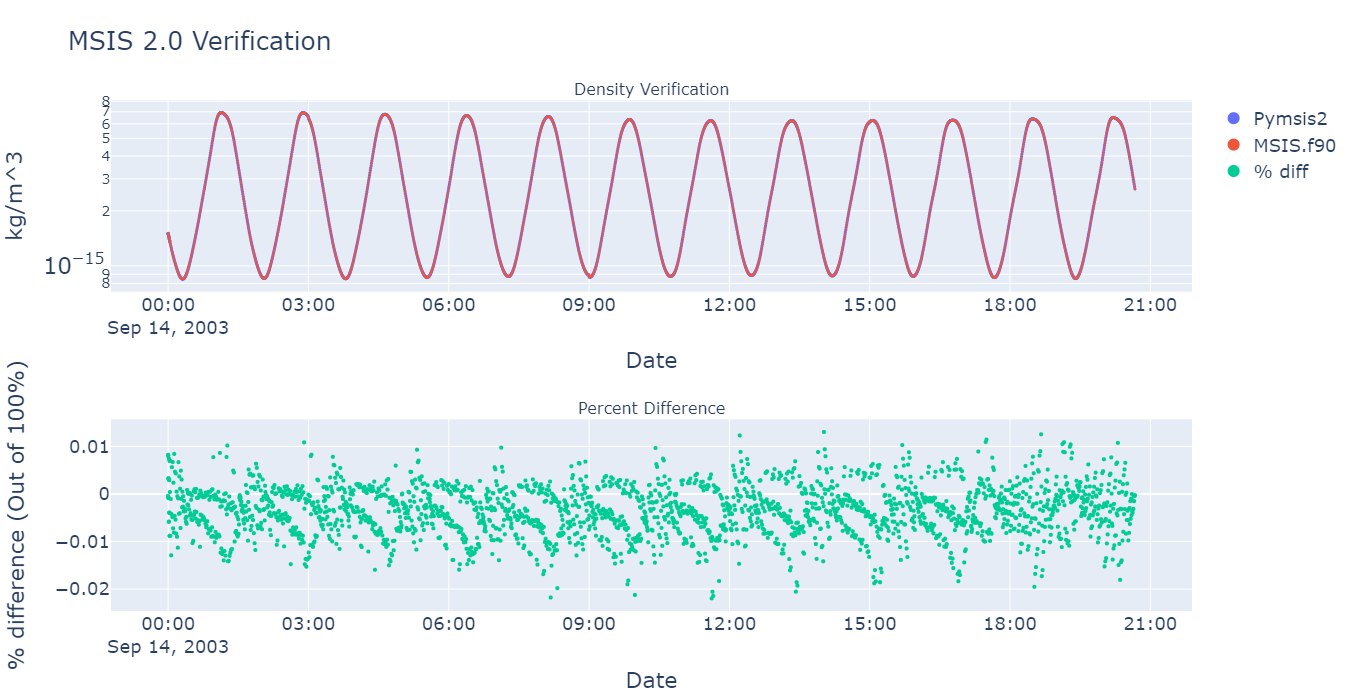

In [41]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import clean_verify_msis2_externally
msis2_df, DEN2_csv = clean_verify_msis2_externally()

from clean_notebook_msis import plot_verify_msis2_externally
fig = plot_verify_msis2_externally(msis2_df, Density_m3, DEN2_csv)

fig.write_image("msis_update_images/plot_verify_msis2_externally.png")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


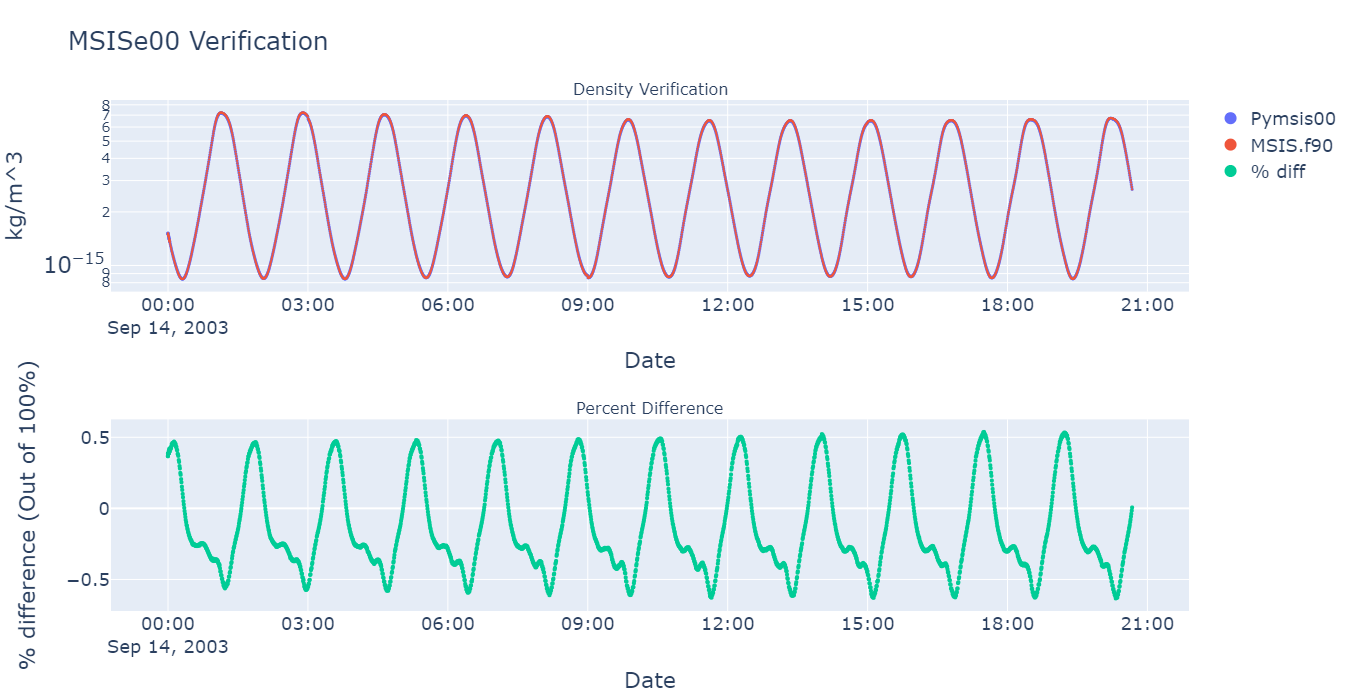

In [42]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import clean_verify_msis00_externally
msis00_df, DEN2_csv = clean_verify_msis00_externally()

from clean_notebook_msis import plot_verify_msis00_externally
fig = plot_verify_msis00_externally(msis00_df, Density_m3, DEN2_csv)

fig.write_image("msis_update_images/plot_verify_msis00_externally.png")

## Compare the Coefficient of Drag

Details:
- the $C_d$ is an adjusted parameter in GEODYN.  Each iteration, it is estimated and adjusted to improve the OD simulation
- $C_d$ is treated as a constant in GEODYN (for any iteration). The factor $C_d$ varies slightly with satellite shape and atmospheric composition. However, for any geodetically useful satellite, it may be treated as a satellite dependent constant.

- $ \bar{A}_D = -\frac{1}{2} C_d \frac{A_s}{m_s} \rho_d v_r \bar{v}_r $
  - $A_D$  acceleration due to atmospheric drag force  
  - $C_d$ is the satellite drag coefficient  
  - $A_s$ is the cross-sectional area of the satellite  
  - $m_s$ is the mass of the satellite  
  - $\rho_d$is the-density of the atmosphere at the satellite position  
  - $\bar{v}_r$  is the velocity vector of the satellite relative to the atmosphere, and  
  - $v_r$  is the magnitude of the velocity vector, vr .  



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


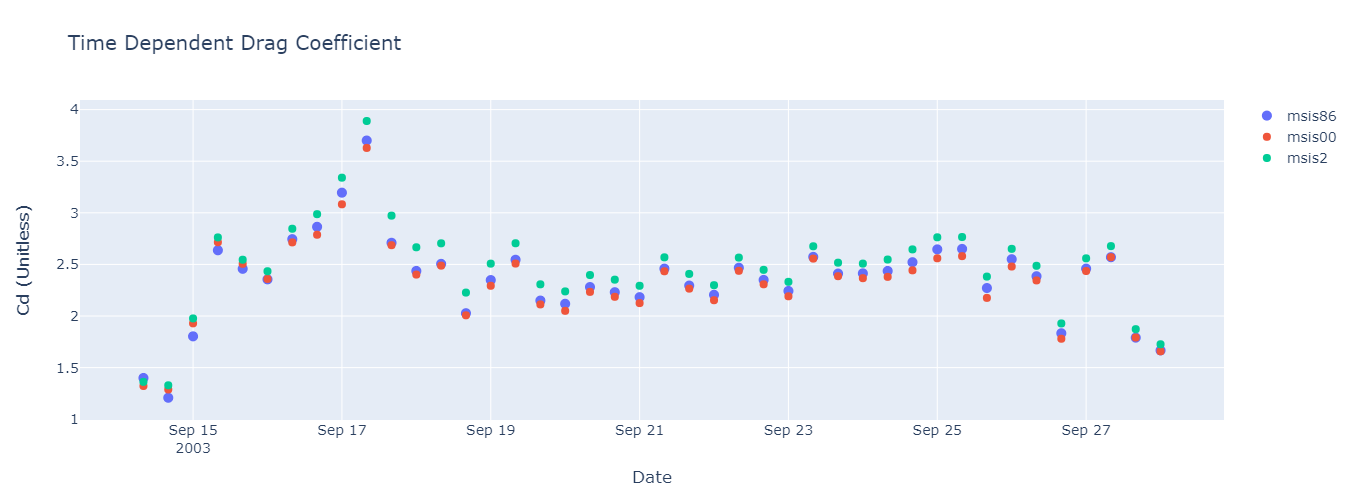

In [81]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import plot_cd_timeseries

fig = plot_cd_timeseries(m1, m2, m3, SAT_ID, AdjustedParams_m1, AdjustedParams_m2, AdjustedParams_m3)

fig.write_image("msis_update_images/plot_cd_timeseries.png")

### Residuals (obervation residuals)
Details:
 - in general, residuals are (observed minus computed)
     - obervation is from the observation file supplied by SLR tracking data
     - computed is what GEODYN is computing the location of the satellite should be
     - 
     


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


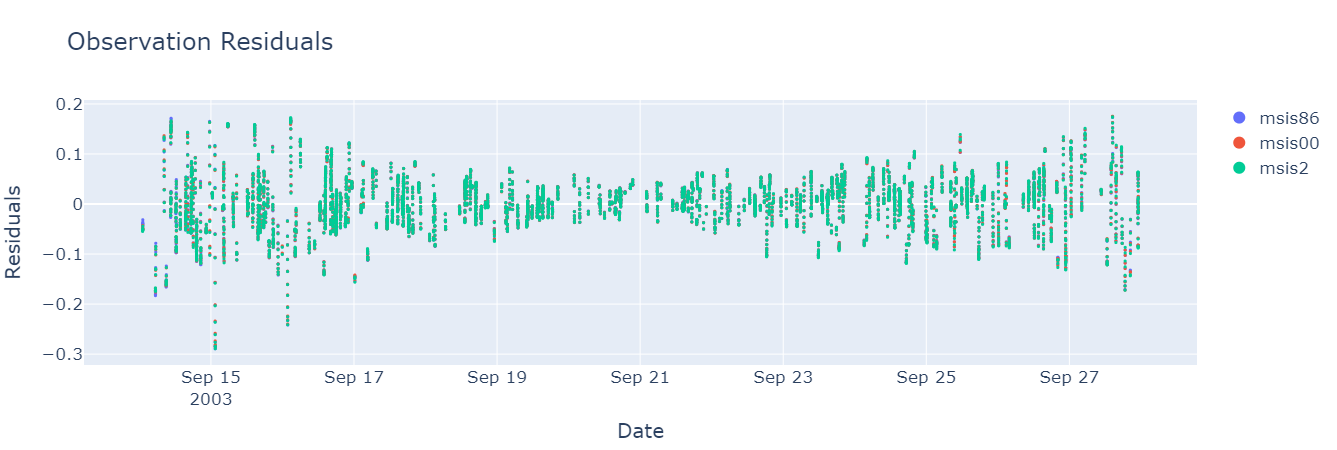

In [66]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import plot_observed_residuals

fig = plot_observed_residuals(m1,m2,m3, ResidsObs_m1, ResidsObs_m2, ResidsObs_m3)
fig.write_image("msis_update_images/plot_observed_residuals.png")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


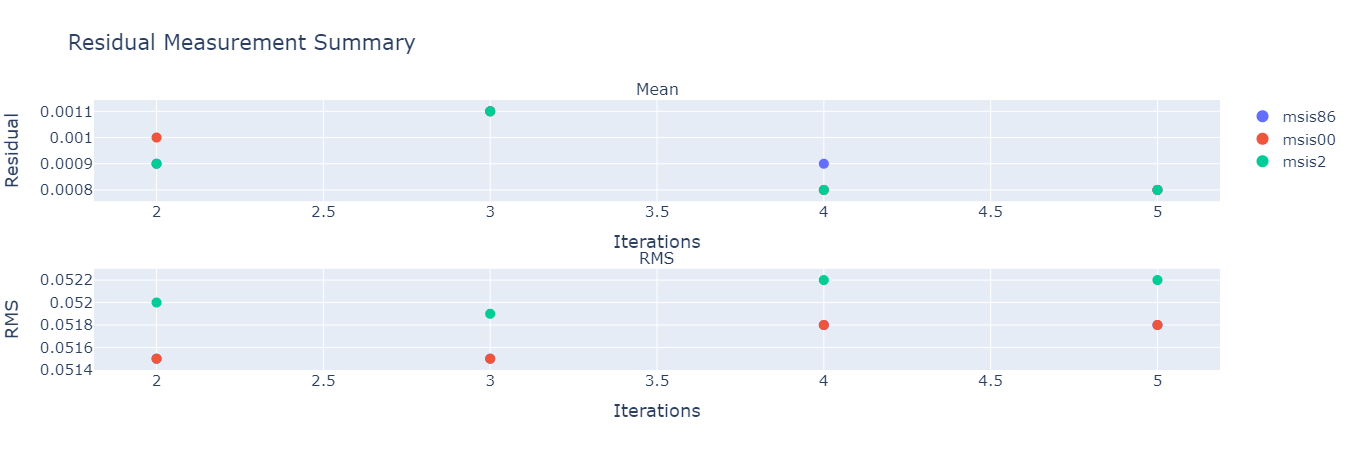

In [79]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import plot_residual_measurement_summary

fig = plot_residual_measurement_summary(m1, m2, m3,ResidsMeasSumm_m1,ResidsMeasSumm_m2,ResidsMeasSumm_m3)

fig.write_image("msis_update_images/plot_residual_measurement_summary.png")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


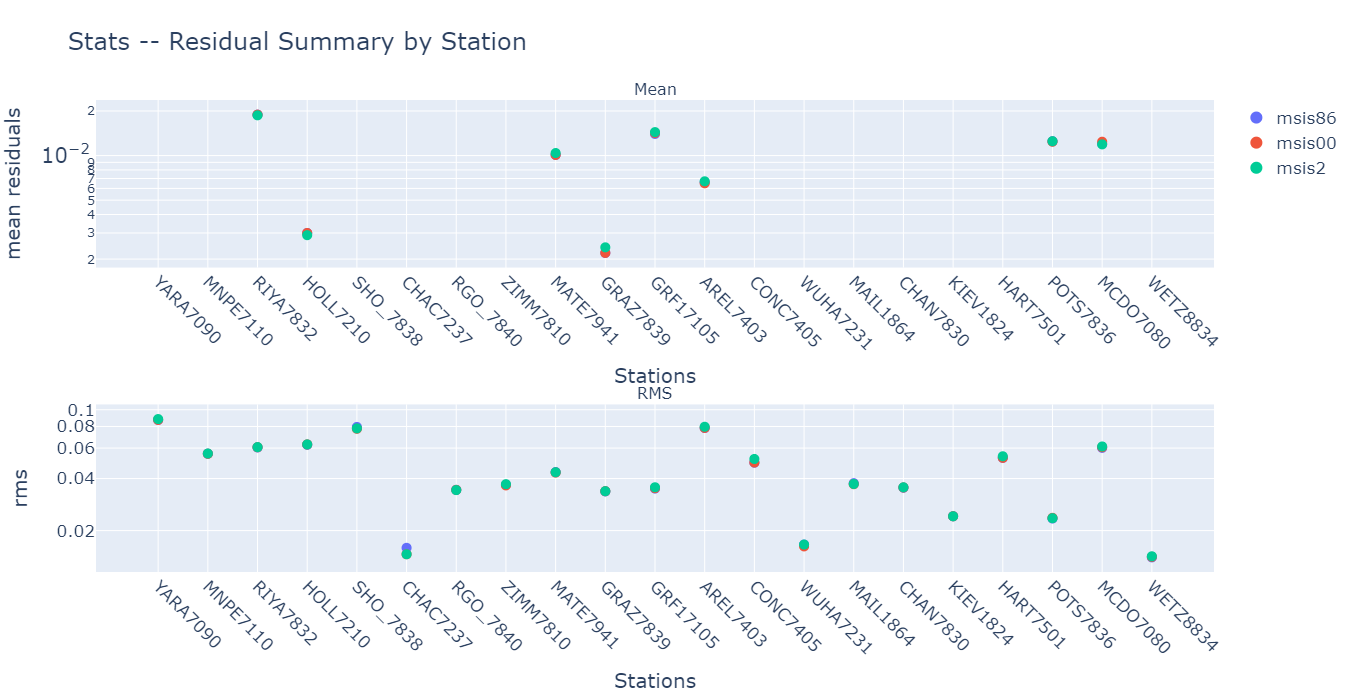

In [46]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import plot_resid_summary_by_station


fig = plot_resid_summary_by_station(m1, m2, m3,ResidsSummStation_m1,ResidsSummStation_m2,ResidsSummStation_m3)

fig.write_image("msis_update_images/plot_resid_summary_by_station.png")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


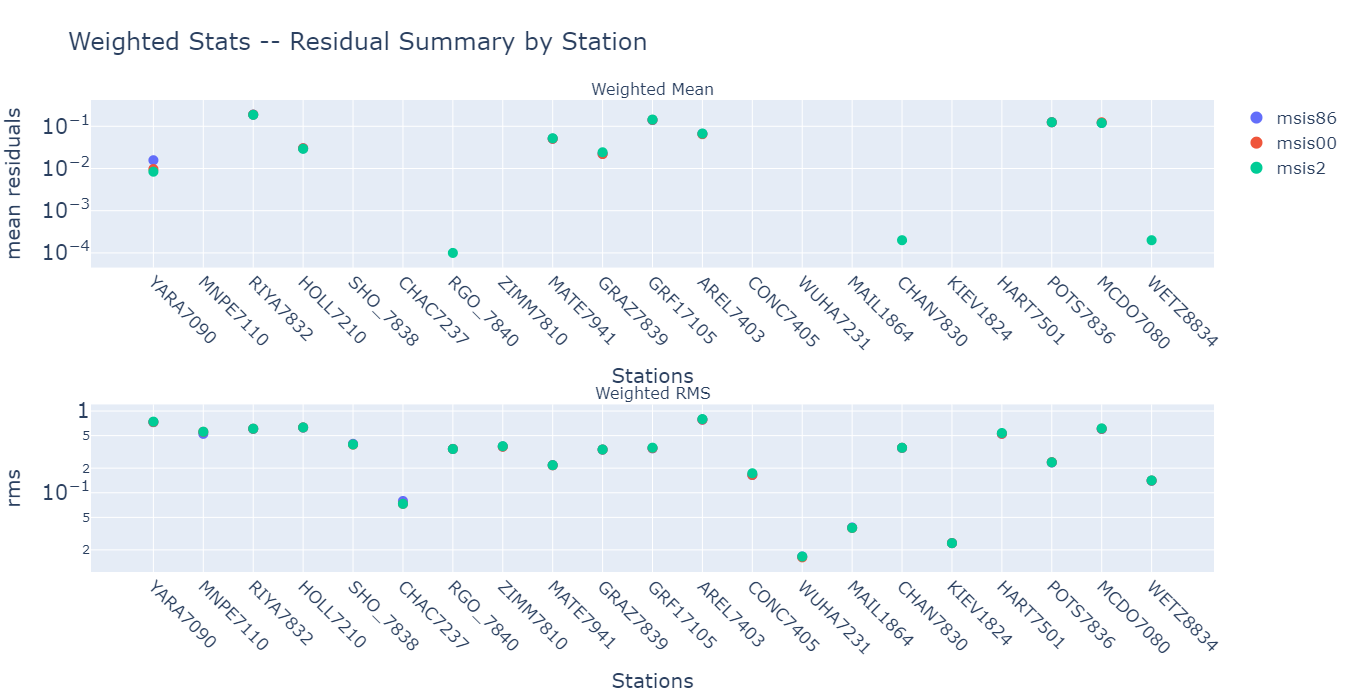

In [47]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import plot_weighted_residual_summary_station


fig = plot_weighted_residual_summary_station(m1, m2, m3, ResidsSummStation_m1, ResidsSummStation_m2, ResidsSummStation_m3)

fig.write_image("msis_update_images/plot_weighted_residual_summary_station.png")


## Density Output Analysis

Details:
- the density is sampled from the models along the orbit of the Starlette satellite





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


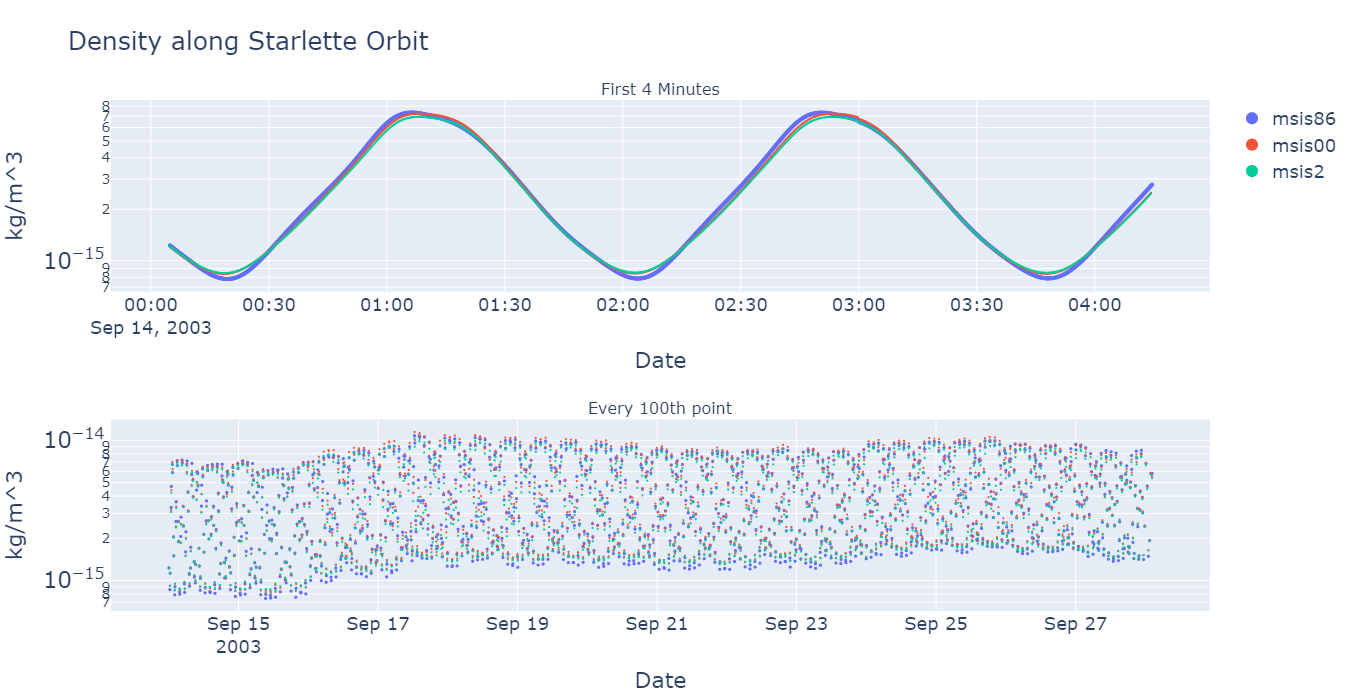

In [48]:
%load_ext autoreload
%autoreload 2

from clean_notebook_msis import plot_density_along_orbit


fig = plot_density_along_orbit(m1, m2, m3, Density_m1, Density_m2, Density_m3)

fig.write_image("msis_update_images/plot_density_along_orbit.png")


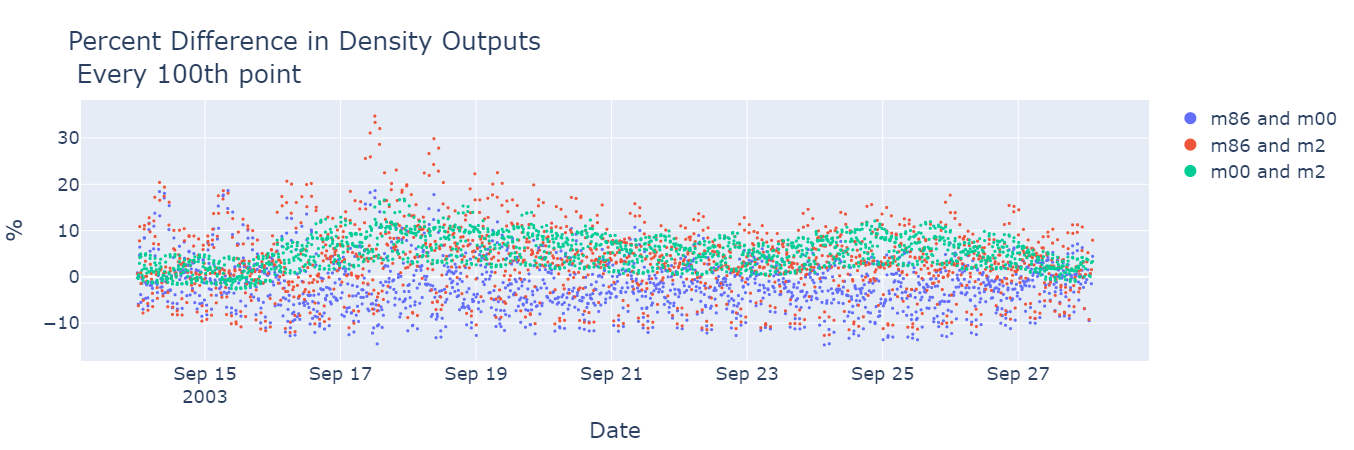

In [65]:
data_nums = 3
import plotly.graph_objects as go
import numpy as np
from plotly.offline import plot, iplot
%matplotlib inline


data_nums = 100

A = Density_m1['rho (kg/m**3)'][::data_nums]
B = Density_m2['rho (kg/m**3)'][::data_nums]
C = Density_m3['rho (kg/m**3)'][::data_nums]

diff1 = ((A-B)/B)*100
diff2 = ((A-C)/C)*100
diff3 = ((B-C)/C)*100


fig = go.Figure(data=[go.Scatter(x=Density_m1['Date'][::data_nums],
                                 y=diff1,
#                                  name = m1+' and '+m2+' % diff',
                                 name = 'm86 and m00',
                                 mode='markers',
                                    marker=dict(
                                    size=3,
                                    ),
                                   ),
                                   ],
                                   )

fig.add_trace(go.Scatter(x=Density_m1['Date'][::data_nums],
                                 y=diff2,
#                                  name = m1+' and '+m3+' % diff',
                                 name = 'm86 and m2',
                                 mode='markers',
                                    marker=dict(
                                    size=3,
                                    ),
                                   ),
                                   )

fig.add_trace(go.Scatter(x=Density_m3['Date'][::data_nums],
                                 y=diff3,
#                                  name = m2+' and '+m3+' % diff',
                                 name = 'm00 and m2',
                                 mode='markers',
                                    marker=dict(
                                    size=3,
                                    ),
                                   ),
                                   )

fig.update_layout(
    title="Percent Difference in Density Outputs <br> Every 100th point",
    yaxis_title='%',
    xaxis_title="Date",
    )
fig.update_layout(legend= {'itemsizing': 'constant'})

fig.update_layout(
        font=dict(
    #             family="Courier New, monospace",
            size=18,
                 ),)
iplot(fig)

fig.write_image("msis_update_images/percent_dff_density_orbit.png")


## DRHODZ


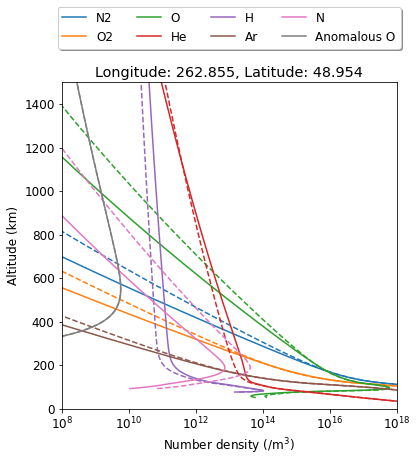

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from pymsis import msis

#  LATITUDE =  48.954 DEG   LONGITUDE = 262.855 DEG   HEIGHT =         1050893.385 M

lon = 262.855 
lat = 48.954
alts = np.linspace(0, 1500, 1500)
f107 = 150
f107a = 150
ap = 7
aps = [[ap]*7]

date = np.datetime64('2003-01-01T00:00')
output_midnight = msis.run(date, lon, lat, alts, f107, f107a, aps)
date = np.datetime64('2003-01-01T12:00')
output_noon = msis.run(date, lon, lat, alts, f107, f107a, aps)

#  output is now of the shape (1, 1, 1, 1000, 11)
# Get rid of the single dimensions
output_midnight = np.squeeze(output_midnight)
output_noon = np.squeeze(output_noon)

variables = ['Total mass density', 'N2', 'O2', 'O', 'He',
             'H', 'Ar', 'N', 'Anomalous O', 'NO', 'Temperature']

_, ax = plt.subplots(figsize=(6,6))
for i, label in enumerate(variables):
    if label in ('NO', 'Total mass density', 'Temperature'):
        # There is currently no NO data, also ignore non-number densities
        continue
    line, = ax.plot(output_midnight[:, i], alts, linestyle='--')
    ax.plot(output_noon[:, i], alts, c=line.get_color(), label=label)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          fancybox=True, shadow=True, ncol=4)
ax.set_title(f"Longitude: {lon}, Latitude: {lat}")
ax.set_xscale('log')
ax.set_xlim(1e8, 1e18)
ax.set_ylim(0, 1500)
ax.set_xlabel('Number density (/m$^3$)')
ax.set_ylabel('Altitude (km)')
mpl.rcParams.update({'font.size': 11})

plt.show()
